### Witam na małym raporciku o FFT - Fast Fourier Transformation, co może być bardzo przydatnym narzędziem do czyszczenia szumu w danych 

#### 0. Importujemy i robimy wstępne adjustments

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size' : 18})

#### 1. Tworzymy prosty sygnał z sinusów o dwóch częstotliwościach (1/50 i 1/120, f_clean), a dalej dodajemy trochę randomowego szumu (f_noisy)

In [26]:
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

f_clean = f
f_noisy = f + 2.5*np.random.randn(len(t))

#### I... Wykresik 1

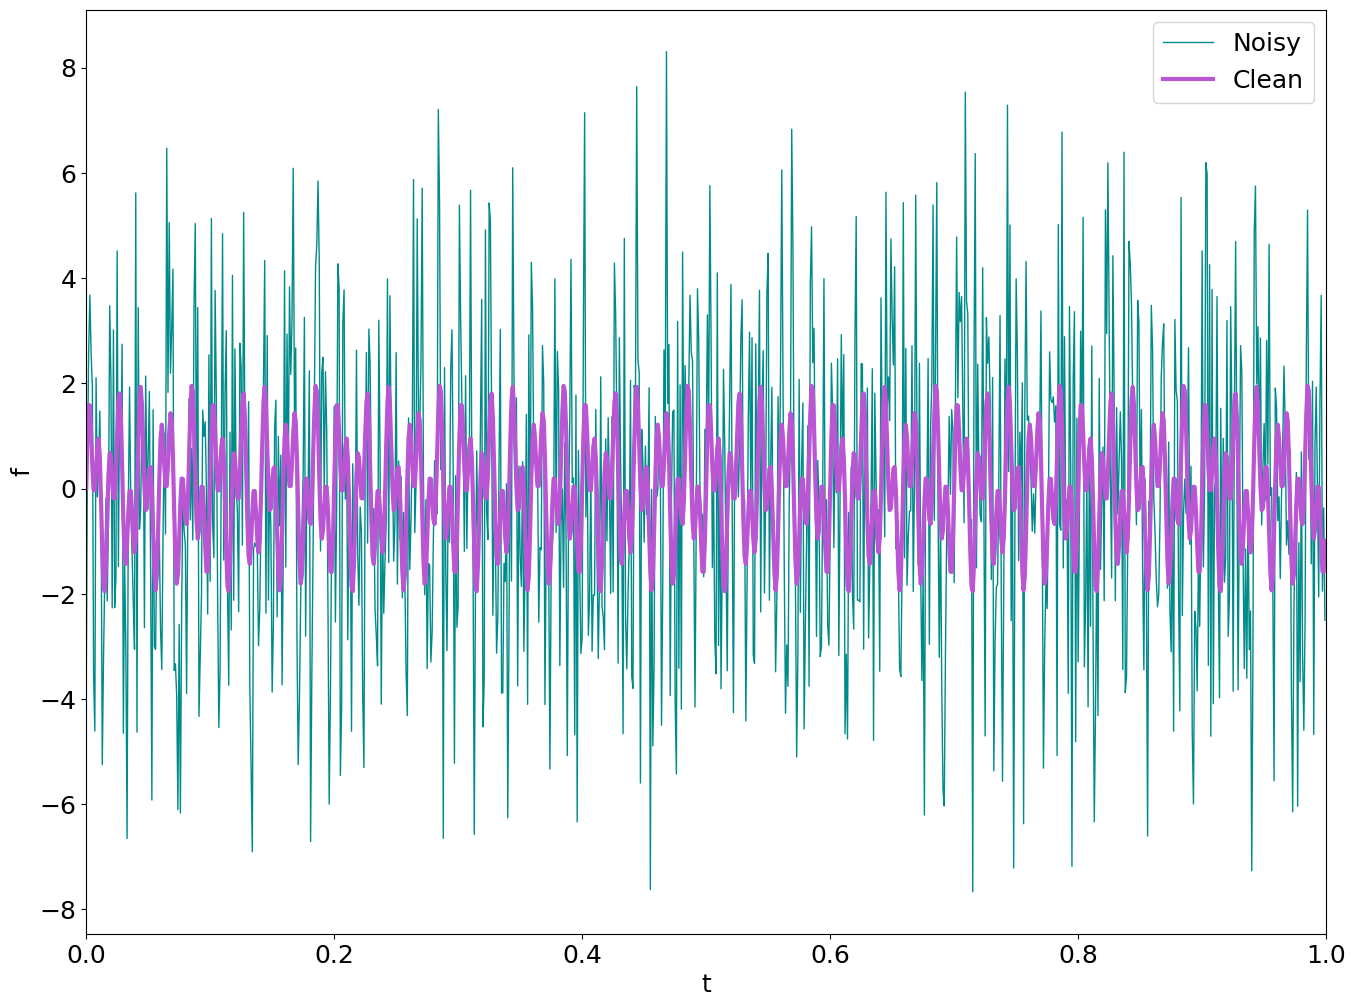

In [27]:
plt.plot(t, f_noisy, color='darkcyan', linewidth = 1, label = 'Noisy')
plt.plot(t, f_clean, color='mediumorchid', linewidth = 3, label = 'Clean')
plt.xlim(0, 1)
plt.xlabel('t')
plt.ylabel('f')
plt.legend()

#### 2. Czarna magia - liczymy Fast Fourier Transform (FFT) tej zaszumionej funkcji (f_noisy)

In [28]:
n = len(t)
fhat = np.fft.fft(f_noisy, n) 
# Karmimy zwerza danymi i ich długością (dane = wektor)
# Wyplówa nam wektor z liczbami zespolonymi (współczynniki Fourierowskie)
# o ciekawych własnościach i interpretacji

PSD = fhat * np.conj(fhat) / n 
# Tworzymy power spectrum, czyli nam są potrzebne
# moduły tych współczynników (conj = sprzężenie)

freq = (1/(dt*n)) * np.arange(n)
# Twórzymy również wektor, który opisuje różnę częstotliwości

L = np.arange(1, np.floor(n/2), dtype='int')

#### I wykresik, bo nawet dwa ich tu jest...

c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


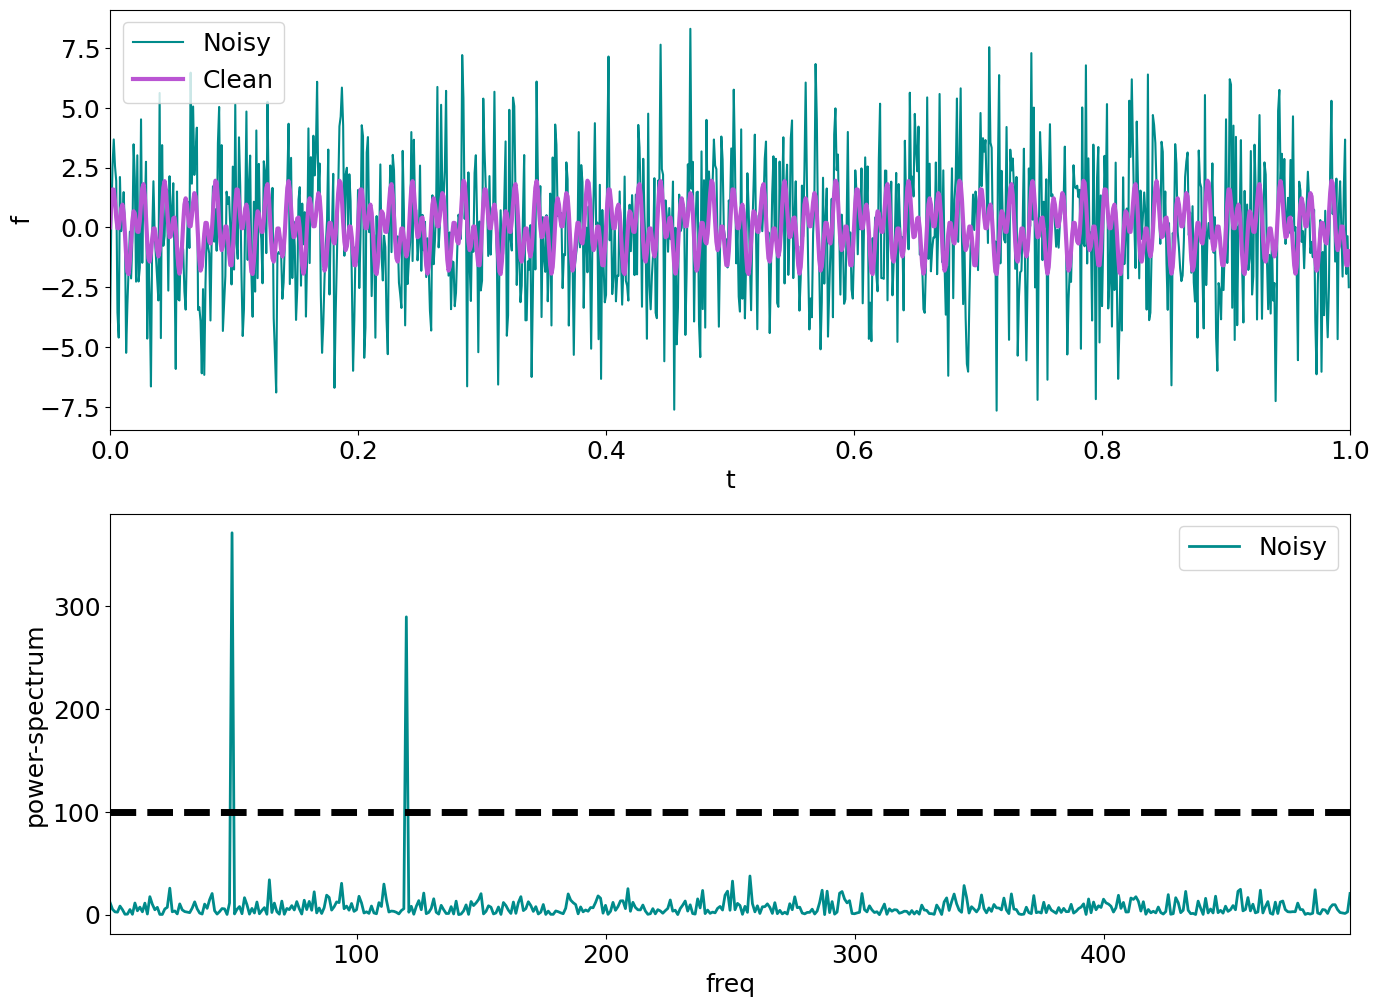

In [29]:
fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t, f_noisy, color='darkcyan', linewidth= 1.5, label='Noisy')
plt.plot(t, f_clean, color='mediumorchid', linewidth=3, label='Clean')
plt.xlim(0, 1)
plt.xlabel('t')
plt.ylabel('f')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='darkcyan', linewidth=2, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('freq')
plt.ylabel('power-spectrum')
plt.axhline(100, 0, 1, linestyle='--',color='k', linewidth=5.0)
plt.legend()

plt.show()

#### 3. Czas zaaplikować filtr - wszystko, co ma siły/mocy/potęgi mniej, niż, powiedźmy, 100 - to jest śmiecie, average enjoyer, simps; co wyżej - prawdziwe sigmy-gigaczady, sukces of sukces 

In [30]:
indices = PSD > 100 #gigaczad/average enjoyer [1, 0]
PSDclean = indices * PSD #zerujemy average enjoyerów
fhat = indices * fhat #zerujemy odpowiednie współczynniki Fouriera

#I robimy Inverse FFT, żeby ze współczynników otrzymać z powrotem funkcje
f_filter = np.fft.ifft(fhat) 

#### I wykresiki, już ostatnie

c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


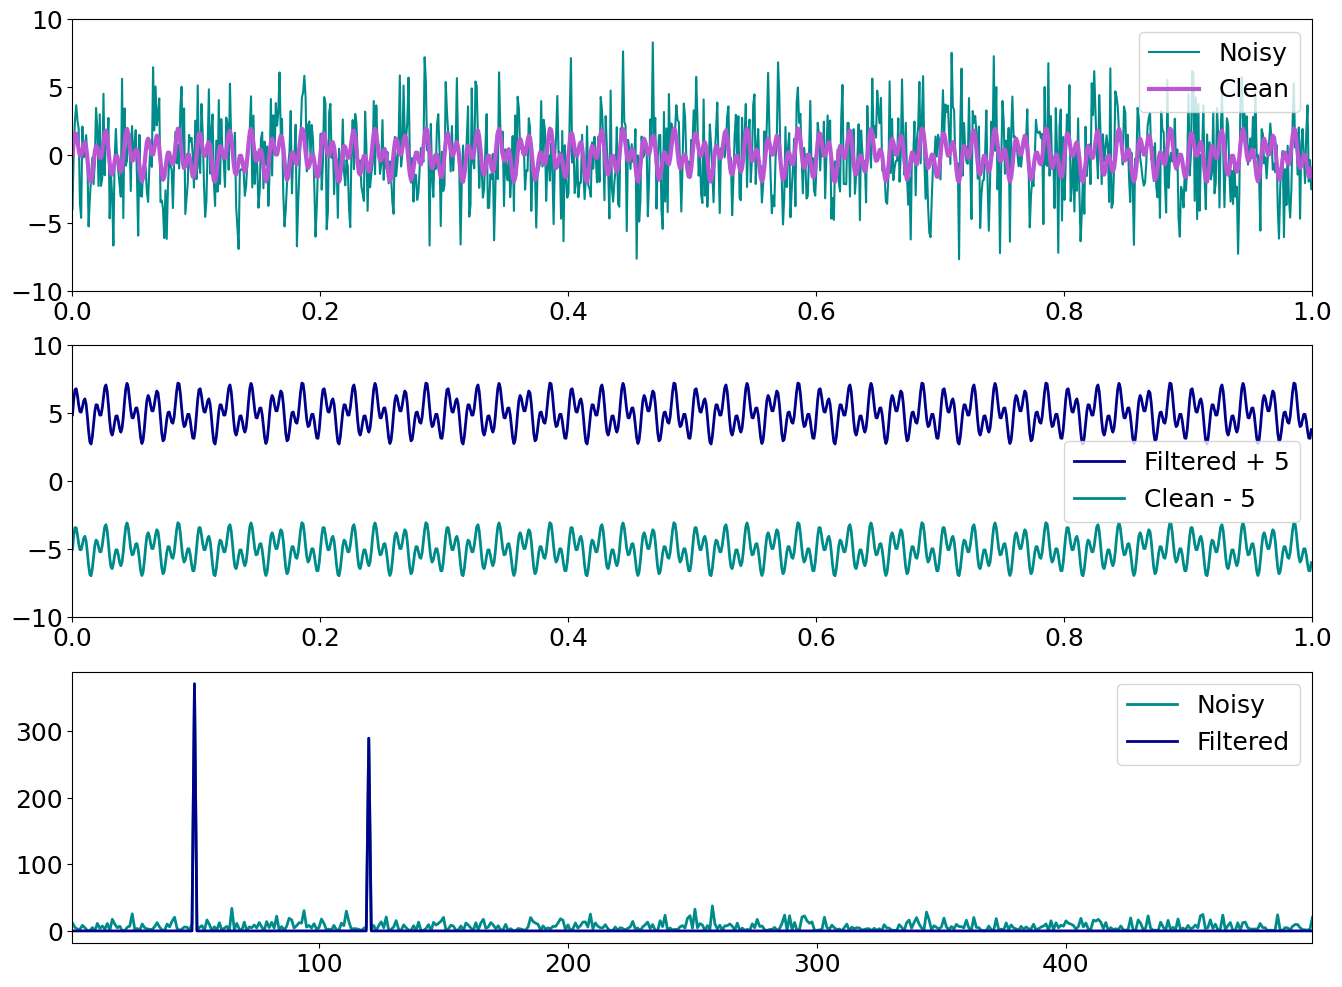

In [32]:
fig, axs = plt.subplots(3, 1)

plt.sca(axs[0])
plt.plot(t, f_noisy, color='darkcyan', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='mediumorchid', linewidth=3, label='Clean')
plt.xlim(0, 1)
plt.ylim(-10, 10)
plt.legend()

plt.sca(axs[1])
plt.plot(t, f_filter + 5, color='darkblue', linewidth=2, label='Filtered + 5')
plt.plot(t, f_clean - 5, color='darkcyan', linewidth=2, label='Clean - 5')
plt.xlim(0, 1)
plt.ylim(-10, 10)
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='darkcyan', linewidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='darkblue', linewidth=2, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

Muszę podziękować Steve Brunton za świetny tutorial, również przydał się w nauce. Szukajcie go na YouTube, jak wam potrzeba jakaś matematyczna czarna magia w Pythonie na magisterce (w tym Machine Learning ; }]# ) [https://www.youtube.com/@Eigensteve]